### For the project below, Spacy was approached as an NLP pipeline for topic modeling to be used for market insights on PILI puppet show.
#### Challenges faced: data needed to be collected from social media, the challenge was due to the chinese text. So BeautifulSoup Python library was attempted with Selenium in order to scrape data, but this turned to be complicated for the project timeframe, hence Apify web scraper was used instead to get CSV ready data.
#### One week conclusion: 
- Utilizing the web scraper and whilst learning about Spacy, the first method shown was used after translating a chinese dataset to english and then converting again to CSV with Excel. But this turned to give an unorganized final CSV dataset, although the full Spacy pipeline was accomplished and a Wordcloud showcasing topic modeling was generated.
- Learning more about Spacy, it turns out that there is a pipline approach for Chinese text. Therefore the proper csv dataset was attempted on with the model. But after this, WordCloud library does not support Chinese text by default. Other ways to look into were noted down post project: 'Jeiba'(generates Chinese wordCloud) was one of them.


In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#to include graphs in jupyter notebook
%matplotlib inline

In [2]:
# this dataset contains post data from thunderbolt show hashtag on instagram
#loading our data
data = pd.read_csv('PILI_instagram_hashtag.csv')
data.head()

,alt,caption,commentsCount,dimensionsHeight,dimensionsWidth,displayUrl,firstComment,hashtags/0,hashtags/1,hashtags/2,...,ownerId,ownerUsername,position,productType,queryTag,shortCode,timestamp,type,url,"videoViewCountvideoViewCount""videoViewCount"""
0,NaN,Huwei Ring of Yunlin County銆?# Thunder Puppet ...,0,612,1080,https://instagram.fgba1- 1.fna.fbcdn.net/v/t51...,NaN,"Thunderbolt Puppet Show-"",Su Huizhen""",NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN
1,"Photo by Jiajun Chen on January 14, 2022. May ...",This time the serial hell is over!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The coolest thing about doing a show is to sen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,My idol is quite different!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## pipline needs:
- normalization
- tokenizer, tagger, parser, ner, ruler, lemmatizer (Spacy model)
- remove stopwords (still need to implement)


In [3]:
import spacy
# print(version('spacy'))
from spacy.lang.en.stop_words import STOP_WORDS as stopwords_list  # stopwords list
import re, string, unicodedata
import contractions                                     # Import contractions library.
import matplotlib.pyplot as plt  

In [4]:
nlp = spacy.load("en_core_web_sm")

In [5]:
dataset = data.copy()

In [6]:
dataset.shape

(2761, 56)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2761 entries, 0 to 2760
Data columns (total 56 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   alt                                           2219 non-null   object 
 1   caption                                       727 non-null    object 
 2   commentsCount                                 379 non-null    object 
 3   dimensionsHeight                              291 non-null    object 
 4   dimensionsWidth                               256 non-null    object 
 5   displayUrl                                    192 non-null    object 
 6   firstComment                                  211 non-null    object 
 7   hashtags/0                                    207 non-null    object 
 8   hashtags/1                                    187 non-null    object 
 9   hashtags/2                                    184 non-null    o

### will focus on first 3 columns ' alt, caption, commentsCount' - deal with commentscount differently later(int)

In [8]:
df = dataset[['alt','caption','commentsCount']]
df.head()

,alt,caption,commentsCount
0,NaN,Huwei Ring of Yunlin County銆?# Thunder Puppet ...,0
1,"Photo by Jiajun Chen on January 14, 2022. May ...",This time the serial hell is over!,NaN
2,The coolest thing about doing a show is to sen...,NaN,NaN
3,NaN,NaN,NaN
4,My idol is quite different!,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2761 entries, 0 to 2760
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   alt            2219 non-null   object
 1   caption        727 non-null    object
 2   commentsCount  379 non-null    object
dtypes: object(3)
memory usage: 64.8+ KB


In [10]:
# df2 = df[df['alt'].notna()] #this takes only the rows in 'alt' that are not null

In [ ]:
# replace null values with "ignore text" so we can use contractions function
# df2.caption.fillna("IGNORE TEXT", inplace=True) 

In [11]:
# df2.info()

In [12]:
# df2.shape

In [25]:
df2 = df.copy()

In [26]:
df2[pd.to_numeric(df2['commentsCount'], errors='coerce').notnull()] #convert to int

,alt,caption,commentsCount
0,NaN,Huwei Ring of Yunlin County銆?# Thunder Puppet ...,0
34,#Classmates are coming# Thunder cloth puppet s...,1,750
49,"#銇娿倓銇欍伩銇仌銇?#Goodnight #6 1 of ""goodnight""",0,1080
56,"#闋傛瓕瑭?#Classic Quotations""",0,1080
59,"#Suhuanzhen# Thunder Puppet Show""",10,1216
...,...,...,...
2714,"#闈掕闀块""",0,917
2721,"#闋傛瓕瑭?#Classic Quotations""",0,1080
2739,"#銇娿倓銇欍伩銇仌銇?#Goodnight#goodnight""",0,1080
2745,"#鎵嬮厭# Lunar New Year Lunar New Year Movie""",0,711


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2761 entries, 0 to 2760
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   alt            2219 non-null   object
 1   caption        727 non-null    object
 2   commentsCount  379 non-null    object
dtypes: object(3)
memory usage: 64.8+ KB


In [15]:
# df.isnull().sum(axis=0)

In [29]:
df2.nunique()

alt              1581
caption           463
commentsCount     177
dtype: int64

## Text Pre-processing:
### Normalization:
             1. replace contractions 2. remove numbers 3. Remove non ASCii characters
             4. convert to lowercase 5. remove punctuations
### Applying nlp model with Spacy (Tokenizer, Tagger, Parser, ner, ruler, lemmatizer)
### Stopwords are removed with wordcloud. need to see how to add it to pipline instead

In [17]:
# df2 = df.copy()

In [30]:
# # this is so processing and spacy is able to function
df2['alt'] = df2['alt'].astype(str)
df2['caption'] = df2['caption'].astype(str)

In [31]:
# # replace contactions for string columns
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

df2['alt'] = df2['alt'].apply(lambda x: replace_contractions(x))
df2['caption'] = df2['caption'].apply(lambda x: replace_contractions(x))

df2.head()

,alt,caption,commentsCount
0,nan,Huwei Ring of Yunlin County銆?# Thunder Puppet ...,0
1,"Photo by Jiajun Chen on January 14, 2022. May ...",This time the serial hell is over!,NaN
2,The coolest thing about doing a show is to sen...,nan,NaN
3,nan,nan,NaN
4,My idol is quite different!,nan,NaN


In [32]:
## applying this to string columns
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

df2['alt'] = df2['alt'].apply(lambda x: remove_numbers(x))
df2['caption'] = df2['caption'].apply(lambda x: remove_numbers(x))

df2.head()

,alt,caption,commentsCount
0,nan,Huwei Ring of Yunlin County銆?# Thunder Puppet ...,0
1,"Photo by Jiajun Chen on January , . May be an ...",This time the serial hell is over!,NaN
2,The coolest thing about doing a show is to sen...,nan,NaN
3,nan,nan,NaN
4,My idol is quite different!,nan,NaN


In [33]:
##trying without stpwords for now

In [34]:
## applying this to string columns
def remove_non_ascii(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [35]:
df2['alt'] = df2['alt'].apply(lambda x: remove_non_ascii(x))
df2['caption'] = df2['caption'].apply(lambda x: remove_non_ascii(x))

In [36]:
df2.head()

,alt,caption,commentsCount
0,nan,Huwei Ring of Yunlin County?# Thunder Puppet S...,0
1,"Photo by Jiajun Chen on January , . May be an ...",This time the serial hell is over!,NaN
2,The coolest thing about doing a show is to sen...,nan,NaN
3,nan,nan,NaN
4,My idol is quite different!,nan,NaN


In [37]:
def to_lowercase(text):
    text = text.lower()
    return text
df2['alt'] = df2['alt'].apply(lambda x: to_lowercase(x))
df2['caption'] = df2['caption'].apply(lambda x: to_lowercase(x))
df2.head()

,alt,caption,commentsCount
0,nan,huwei ring of yunlin county?# thunder puppet s...,0
1,"photo by jiajun chen on january , . may be an ...",this time the serial hell is over!,NaN
2,the coolest thing about doing a show is to sen...,nan,NaN
3,nan,nan,NaN
4,my idol is quite different!,nan,NaN


In [38]:
def remove_punctuation(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text
df2['alt'] = df2['alt'].apply(lambda x: remove_punctuation(x))
df2['caption'] = df2['caption'].apply(lambda x: remove_punctuation(x))
df2.head()

,alt,caption,commentsCount
0,nan,huwei ring of yunlin county thunder puppet sho...,0
1,photo by jiajun chen on january may be an im...,this time the serial hell is over,NaN
2,the coolest thing about doing a show is to sen...,nan,NaN
3,nan,nan,NaN
4,my idol is quite different,nan,NaN


In [39]:
## applying nlp model
df2['alt'] = df2['alt'].apply(lambda x: nlp(x))
df2['caption'] = df2['caption'].apply(lambda x: nlp(x))
df2.head()

,alt,caption,commentsCount
0,(nan),"(huwei, ring, of, yunlin, county, thunder, pup...",0
1,"(photo, by, jiajun, chen, on, january, , may...","(this, time, the, serial, hell, is, over)",NaN
2,"(the, coolest, thing, about, doing, a, show, i...",(nan),NaN
3,(nan),(nan),NaN
4,"(my, idol, is, quite, different)",(nan),NaN


# WordCloud

In [40]:
import wordcloud

In [44]:
def show_wordcloud(df2, title):
    text = ' '.join(df2['alt'].astype(str).tolist())                 # Converting specific column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

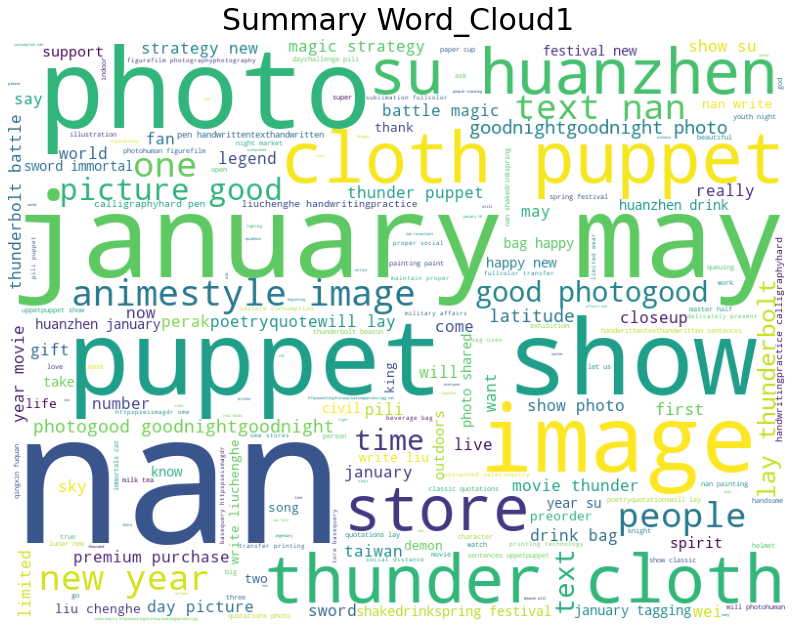

In [45]:
show_wordcloud(dftest2,'Summary Word_Cloud1')

In [46]:
def show_wordcloud2(df2, title):
    text = ' '.join(df2['caption'].astype(str).tolist())                 # Converting specific column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

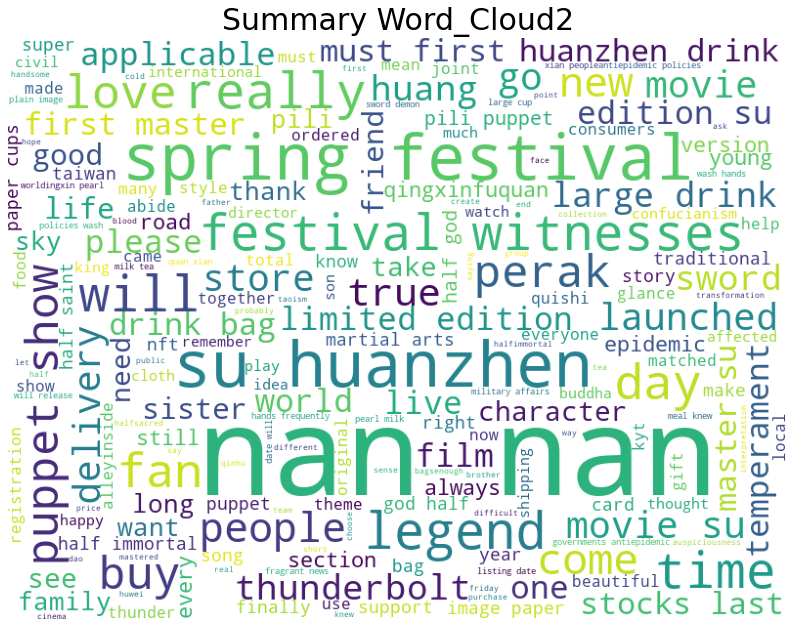

In [47]:
show_wordcloud2(dftest2,'Summary Word_Cloud2')

In [49]:
#could find max commented as well based on CommentCount

In [50]:
#stop words were removed with wordcloud, but nan values not removed yet

## implementing on proper dataset (but in chinese) using zh_nlp model

In [51]:
#testing on non translated proper csv
twitter_test = pd.read_csv('dataset_twitter.csv') #this data is on top 100 tweets on 'thunderbolt hero'
twitter_test.head()

,conversation_id,created_at,favorite_count,full_text,hashtags/0,hashtags/1,hashtags/2,hashtags/3,hashtags/4,hashtags/5,...,user/statuses_count,user/time_zone,user/translator_type,user/url,user/utc_offset,user/verified,user/want_retweets,user_mentions/0/id_str,user_mentions/0/name,user_mentions/0/screen_name
0,1472173126696173574,2021-12-18T11:53:19.000Z,34,【2021/12/18 宜蘭直營門市霹靂英雄見面會📣】\n▪偶像名單：原無鄉（玄甲）、天劍非...,霹靂布袋戲,宜蘭傳藝店,原無鄉,天劍非天,霹靂英雄見面會,NaN,...,773,NaN,none,https://t.co/RqdHDwNWLs,NaN,False,NaN,NaN,NaN,NaN
1,1459746056120389632,2021-11-14T04:52:35.000Z,28,◆霹靂英雄戰紀カクテル第二弾◆\n道友は誰と飲んでみたい？🍷\nこんなにオススメのキャラカク...,NaN,NaN,NaN,NaN,NaN,NaN,...,8893,NaN,none,https://t.co/GunXswmGSm,NaN,False,NaN,NaN,NaN,NaN
2,1149650712558632962,2019-07-12T12:04:24.000Z,14,おお！Netflixで布袋劇が観られる日が来ようとは！！\n＞PILI人形劇：ウォー・オブ・...,NaN,NaN,NaN,NaN,NaN,NaN,...,51438,NaN,regular,https://t.co/IgfQjykmPc,NaN,False,NaN,NaN,NaN,NaN
3,1309315326127996928,2020-09-25T02:14:34.000Z,14,#벽력신상품정보\n【9/25(금)📣】\n\n➤투명카드-제3탄\n➤《Thunderbo...,벽력신상품정보,NaN,NaN,NaN,NaN,NaN,...,572,NaN,none,NaN,NaN,False,NaN,NaN,NaN,NaN
4,1431124343707164673,2021-08-27T05:20:07.000Z,19,...drink your #puppet hero #beer. \n\n#霹靂 英雄 寒...,puppet,beer,霹靂,NaN,NaN,NaN,...,3661,NaN,none,NaN,NaN,False,NaN,NaN,NaN,NaN


In [52]:
testdataset = twitter_test.copy()

In [53]:
testdataset.shape

(100, 86)

In [54]:
testdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 86 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   conversation_id                                         100 non-null    int64  
 1   created_at                                              100 non-null    object 
 2   favorite_count                                          100 non-null    int64  
 3   full_text                                               100 non-null    object 
 4   hashtags/0                                              28 non-null     object 
 5   hashtags/1                                              18 non-null     object 
 6   hashtags/2                                              15 non-null     object 
 7   hashtags/3                                              8 non-null      object 
 8   hashtags/4                               

In [55]:
#well focus on 'full_text' column
tdf = testdataset[['full_text']]
tdf.head()

,full_text
0,【2021/12/18 宜蘭直營門市霹靂英雄見面會📣】\n▪偶像名單：原無鄉（玄甲）、天劍非...
1,◆霹靂英雄戰紀カクテル第二弾◆\n道友は誰と飲んでみたい？🍷\nこんなにオススメのキャラカク...
2,おお！Netflixで布袋劇が観られる日が来ようとは！！\n＞PILI人形劇：ウォー・オブ・...
3,#벽력신상품정보\n【9/25(금)📣】\n\n➤투명카드-제3탄\n➤《Thunderbo...
4,...drink your #puppet hero #beer. \n\n#霹靂 英雄 寒...


In [56]:
zh_nlp = spacy.load("zh_core_web_sm") #chinese model

In [57]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


In [58]:
tdf2 = tdf.copy()

In [59]:
tdf2.nunique()

full_text    100
dtype: int64

## Text Pre-processing:

In [60]:
# this is so processing and spacy is able to function
tdf2['full_text'] = tdf2['full_text'].astype(str)

In [61]:
tdf2['full_text'] = tdf2['full_text'].apply(lambda x: replace_contractions(x))

tdf2.head()

,full_text
0,【2021/12/18 宜蘭直營門市霹靂英雄見面會📣】\n▪偶像名單：原無鄉（玄甲）、天劍非...
1,◆霹靂英雄戰紀カクテル第二弾◆\n道友は誰と飲んでみたい？🍷\nこんなにオススメのキャラカク...
2,おお！Netflixで布袋劇が観られる日が来ようとは！！\n＞PILI人形劇：ウォー・オブ・...
3,#벽력신상품정보\n【9/25(금)📣】\n\n➤투명카드-제3탄\n➤《Thunderbo...
4,...drink your #puppet hero #beer. \n\n#霹靂 英雄 寒...


In [62]:
tdf2['full_text'] = tdf2['full_text'].apply(lambda x: remove_numbers(x))

tdf2.head()

,full_text
0,【// 宜蘭直營門市霹靂英雄見面會📣】\n▪偶像名單：原無鄉（玄甲）、天劍非天✨\n▫️操偶...
1,◆霹靂英雄戰紀カクテル第二弾◆\n道友は誰と飲んでみたい？🍷\nこんなにオススメのキャラカク...
2,おお！Netflixで布袋劇が観られる日が来ようとは！！\n＞PILI人形劇：ウォー・オブ・...
3,#벽력신상품정보\n【/(금)📣】\n\n➤투명카드-제탄\n➤《Thunderbolt F...
4,...drink your #puppet hero #beer. \n\n#霹靂 英雄 寒...


In [63]:
tdf2['full_text'] = tdf2['full_text'].apply(lambda x: remove_punctuation(x))
tdf2.head()

,full_text
0,宜蘭直營門市霹靂英雄見面會\n偶像名單原無鄉玄甲天劍非天\n操偶師蕭儀村師傅主持人風三少助...
1,霹靂英雄戰紀カクテル第二弾\n道友は誰と飲んでみたい\nこんなにオススメのキャラカクテルがあ...
2,おおNetflixで布袋劇が観られる日が来ようとは\nPILI人形劇ウォーオブドラゴンズ霹靂...
3,벽력신상품정보\n금\n\n투명카드제탄\nThunderbolt Fantasy Proj...
4,drink your puppet hero beer \n\n霹靂 英雄 寒煙翠 http...


In [64]:
## applying nlp model
tdf2['full_text'] = tdf2['full_text'].apply(lambda x: zh_nlp(x))
tdf2.head()

,full_text
0,"( , 宜蘭, 直營, 門市, 霹靂, 英雄, 見面, 會, \n, 偶像, 名單, 原無,..."
1,"(霹靂, 英雄, 戰紀, カク, テル, 第二, 弾, \n, 道友, は誰, と飲, んで..."
2,"(おお, Netflix, で, 布袋, 劇が, 観ら, れる, 日が, 来, よう, とは..."
3,"(벽력, 신상, 품정, 보, \n, 금, \n\n, 투명, 카드, 제탄, \n, T..."
4,"(drink, your, puppet, hero, beer, \n\n, 霹靂, 英雄..."


In [65]:
def show_wordcloud_zh(tdf2, title):
    text = ' '.join(tdf2['full_text'].astype(str).tolist())                 # Converting specific column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

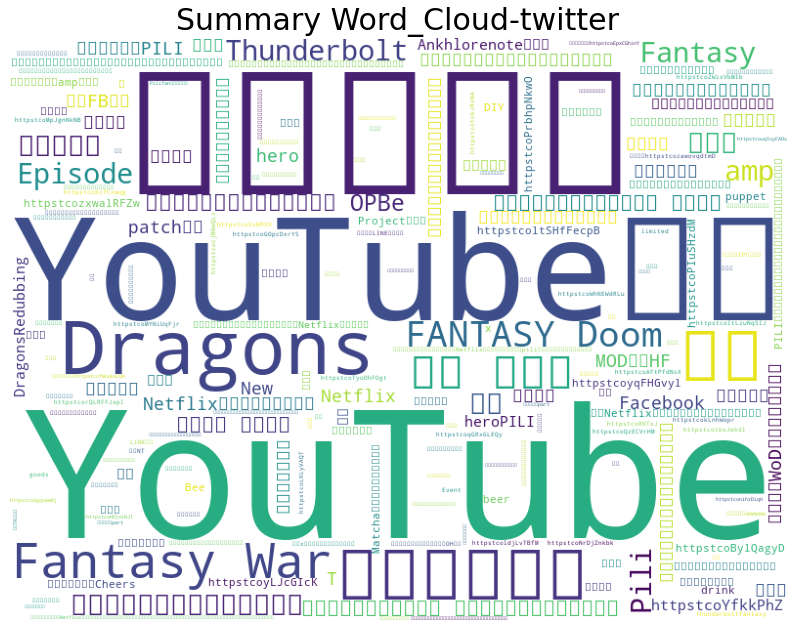

In [66]:
show_wordcloud_zh(tdf2,'Summary Word_Cloud-twitter')

## Would look into 'Jeiba' library for producing wordcloud in Chinese support